In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

from src.HMM import *

In [88]:
import pickle

In [2]:
# Load from csv and compute results
msci_data = pd.read_csv('MSCI World Index_11_22_21-12_31_93.csv')
returns = msci_data.set_index('Date').sort_index().pct_change().dropna().query('Date >= "1997-01-01" and Date <= "2015-12-31"')
log_returns = np.log(1 + returns.Close.values)[:,np.newaxis]

In [11]:
def max_drawdown(values):
    c_max = -1
    d = 10000
    for v in values:
        if v > c_max:
            c_max = v
        
        if (v - c_max) < d:
            d = v - c_max
            v_at = v
    return c_max, 

In [112]:
dIndex = pd.DatetimeIndex(returns.index.values)

In [142]:
strategy = np.fromfile('strategy_1')

In [163]:
holding = np.fromfile('holding_strategy_1')

In [181]:
params = pickle.load(open("params_strategy_2.pkl",'rb')).squeeze()

In [151]:
strat_returns = np.diff(np.log(strategy))

In [159]:
m, d = max_drawdown(strategy)

In [160]:
'{:0.2f}%'.format(-d*100/m)

'22.67%'

In [17]:
mi, di = max_drawdown(100*np.exp(log_returns[260:].cumsum()))

In [147]:
'{:0.2f}%'.format(-di*100/mi)

'54.88%'

In [36]:
risk_free = pd.read_csv('1-year-treasury-rate-yield-chart.csv')

In [37]:
risk_free = pd.DataFrame(risk_free.set_index('date').values/100, index=pd.DatetimeIndex(risk_free.set_index('date').index, name='Date'), columns=['rate'])

In [48]:
rf = risk_free.query('Date >= "1997-01-01" and Date <= "2015-12-31"').values.mean()

In [152]:
strat_mu = strat_returns.mean()*252
strat_sigma = strat_returns.std()*np.sqrt(252)

In [153]:
'{:0.3f}'.format(strat_mu)

'0.019'

In [154]:
'{:0.3f}'.format(strat_sigma)

'0.101'

In [82]:
index_mu = log_returns[260:].mean()*252
index_sigma = log_returns[260:].std()*np.sqrt(252)

In [155]:
'{:0.3f}'.format(index_mu)

'0.033'

In [156]:
'{:0.3f}'.format(index_sigma)

'0.164'

In [157]:
'{:0.2f}'.format((strat_mu - rf)/strat_sigma)

'-0.06'

In [158]:
'{:0.2f}'.format((index_mu - rf)/index_sigma)

'0.05'

In [161]:
'{:0.2f}'.format(-strat_mu/(d/m))

'0.08'

In [87]:
'{:0.2f}'.format(-index_mu/(di/mi))

'0.06'

In [164]:
'{:0.2f}'.format(np.diff(holding).mean()*252*100)

'5.40'

In [74]:
'{:0.3f}'.format(strat_returns.mean()*252)

'0.041'

In [75]:
'{:0.3f}'.format(log_returns[260:].mean()*252)

'0.033'

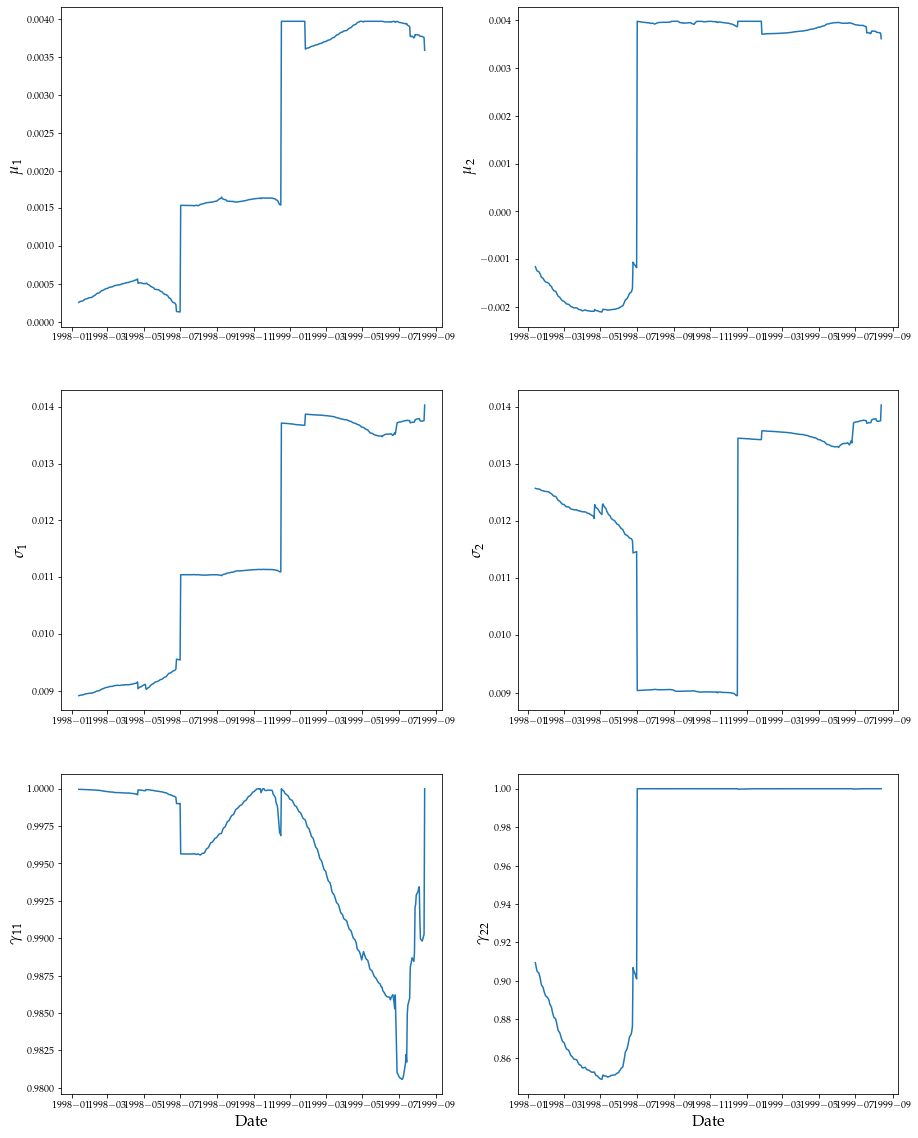

In [182]:
last = params.shape[0]
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,20))
ax1.plot(dIndex[260:260+last].to_pydatetime(), params[:,3])
ax1.set_ylabel(r'$\mu_1$', fontdict={"size":16})
ax2.plot(dIndex[260:260+last].to_pydatetime(), params[:,5])
ax2.set_ylabel(r'$\mu_2$', fontdict={"size":16})
ax3.plot(dIndex[260:260+last].to_pydatetime(), params[:,4])
ax3.set_ylabel(r'$\sigma_1$', fontdict={"size":16})
ax4.plot(dIndex[260:260+last].to_pydatetime(), params[:,6])
ax4.set_ylabel(r'$\sigma_2$', fontdict={"size":16})
ax5.plot(dIndex[260:260+last].to_pydatetime(), params[:,1])
ax5.set_ylabel(r'$\gamma_{11}$', fontdict={"size":16})
ax5.set_xlabel('Date', fontdict={"size":16})
ax6.plot(dIndex[260:260+last].to_pydatetime(), params[:,2])
ax6.set_ylabel(r'$\gamma_{22}$', fontdict={"size":16})
ax6.set_xlabel('Date', fontdict={"size":16})
plt.show()
# plt.savefig('params-v2.png')

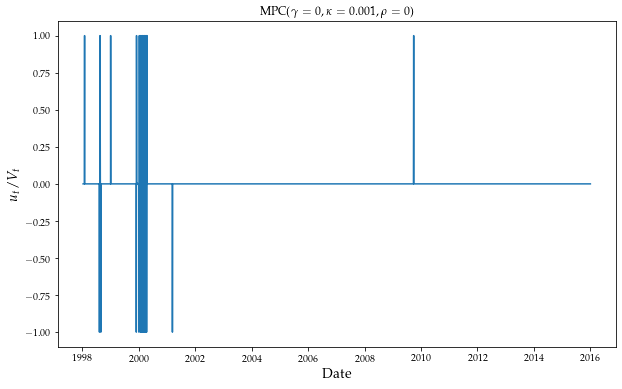

In [170]:
fig, ax = plt.subplots(1, figsize=(10,6))
ax.plot(dIndex[261:].to_pydatetime(), np.diff(holding))
ax.set_xlabel('Date', fontdict={"size":14})
ax.set_ylabel(r'$u_t/V_t$', fontdict={"size":14})
ax.set_title(r'MPC($\gamma=0,\kappa=0.001,\rho=0$)')
plt.show()
# plt.savefig('trades-v2.png')

In [130]:
# from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [173]:
N_eff = 260

In [171]:
strategy1 = np.fromfile('strategy_0')
holding1 = np.fromfile('holding_strategy_0')

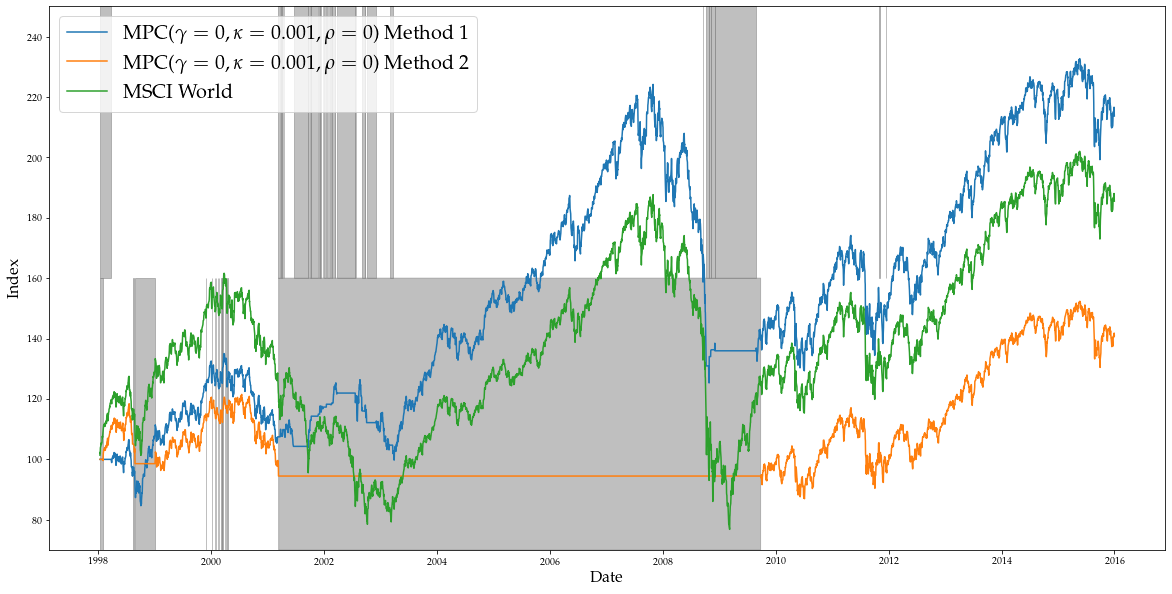

In [179]:
figure, ax = plt.subplots(1, figsize=(20,10))
ax.plot(dIndex[N_eff:].to_pydatetime(),strategy1, label=r'MPC($\gamma = 0,\kappa=0.001,\rho=0$) Method 1')
ax.plot(dIndex[N_eff+1:].to_pydatetime(),strategy, label=r'MPC($\gamma = 0,\kappa=0.001,\rho=0$) Method 2')
ax.plot(dIndex[N_eff:].to_pydatetime(),100*np.exp(log_returns[N_eff:].cumsum()),label='MSCI World')
ax.fill_between(dIndex[N_eff-1:].to_pydatetime(), 0.5, 1, np.array(holding1) == 0,
                color='gray', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(dIndex[N_eff+1:].to_pydatetime(), 0, 0.5, np.array(holding)[1:] == 0,
                color='gray', alpha=0.5, transform=ax.get_xaxis_transform())
ax.set_xlabel('Date',fontdict={'size':16})
ax.set_ylabel('Index',fontdict={'size':16})
ax.set_ylim(70,250)
plt.legend(loc='upper left',fontsize=20)
# plt.show()
plt.savefig('backtest-v2.png')